<a href="https://colab.research.google.com/github/bskarthik05/Task_8/blob/main/Task_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [23]:
print("1. Data Exploration and Visualization")
df = pd.read_csv('/content/sample_data/Mall_Customers.csv')

1. Data Exploration and Visualization


In [24]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [25]:
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [26]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
print("2. Finding the Optimal Number of Clusters (K) using the Elbow Method")
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

2. Finding the Optimal Number of Clusters (K) using the Elbow Method


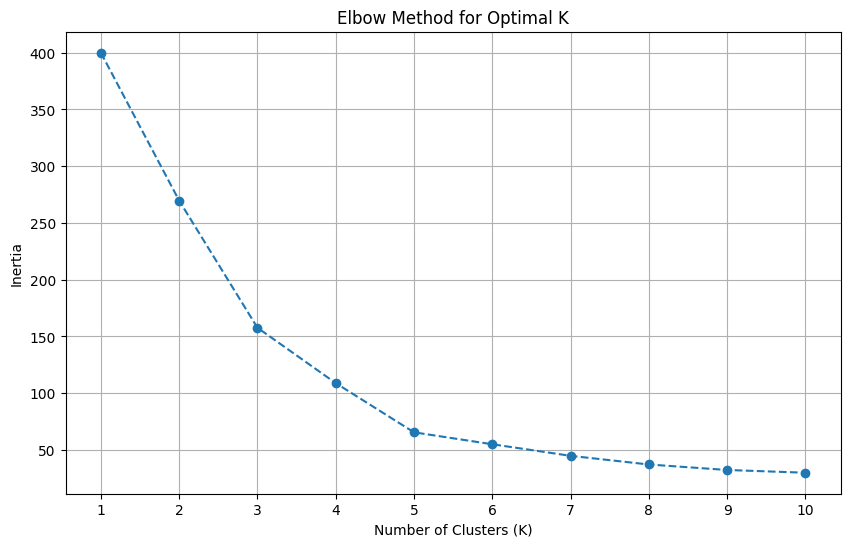


From the plot, the 'elbow' point is at K=5. This suggests that 5 is the optimal number of clusters.


In [29]:
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.grid(True)
plt.show()
print("\nFrom the plot, the 'elbow' point is at K=5. This suggests that 5 is the optimal number of clusters.")

In [30]:
print("3. Performing K-Means Clustering with Optimal K")
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

3. Performing K-Means Clustering with Optimal K


In [31]:
df['Cluster'] = cluster_labels
print("First 5 rows of the DataFrame with Cluster Labels:")
print(df.head())

First 5 rows of the DataFrame with Cluster Labels:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


4. Visualizing the Clusters


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

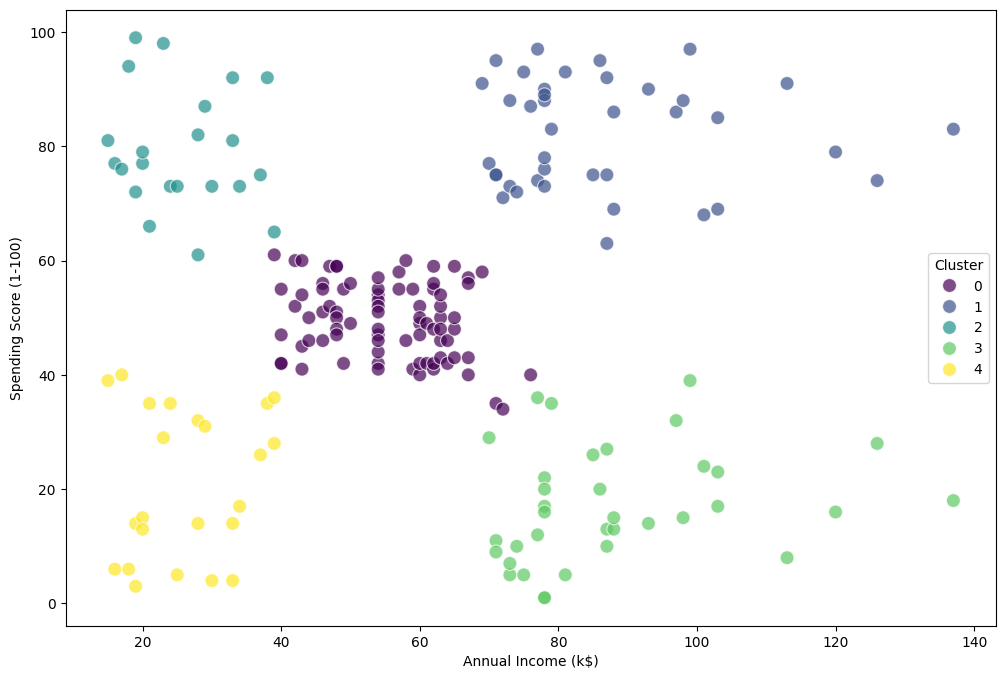

In [32]:
print("4. Visualizing the Clusters")
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster',
                data=df, palette='viridis', s=100, alpha=0.7, legend='full')

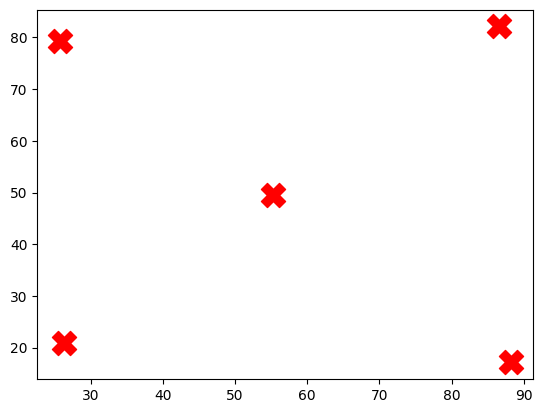

In [33]:
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

<ipython-input-34-771ae6ec2b41>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


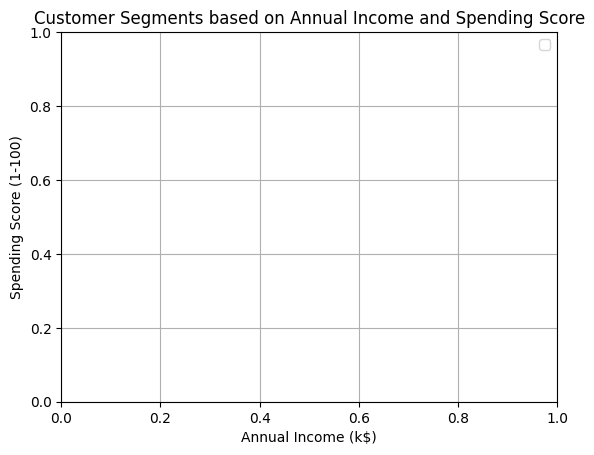

In [34]:
plt.title('Customer Segments based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
print("5. Evaluating the Clustering with Silhouette Score")
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"\nThe Silhouette Score for K={optimal_k} is: {silhouette_avg:.4f}")
print("A score closer to 1 indicates that the clusters are well-separated.")

5. Evaluating the Clustering with Silhouette Score

The Silhouette Score for K=5 is: 0.5547
A score closer to 1 indicates that the clusters are well-separated.


In [36]:
print("Optional: Clustering with more features and visualizing with PCA")
# Let's see what happens if we include 'Age' in our clustering
X_more_features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X_more_features_scaled = scaler.fit_transform(X_more_features)


Optional: Clustering with more features and visualizing with PCA


In [37]:
kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels_pca = kmeans_pca.fit_predict(X_more_features_scaled)


In [38]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_more_features_scaled)

In [39]:
df_pca = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca['Cluster'] = cluster_labels_pca

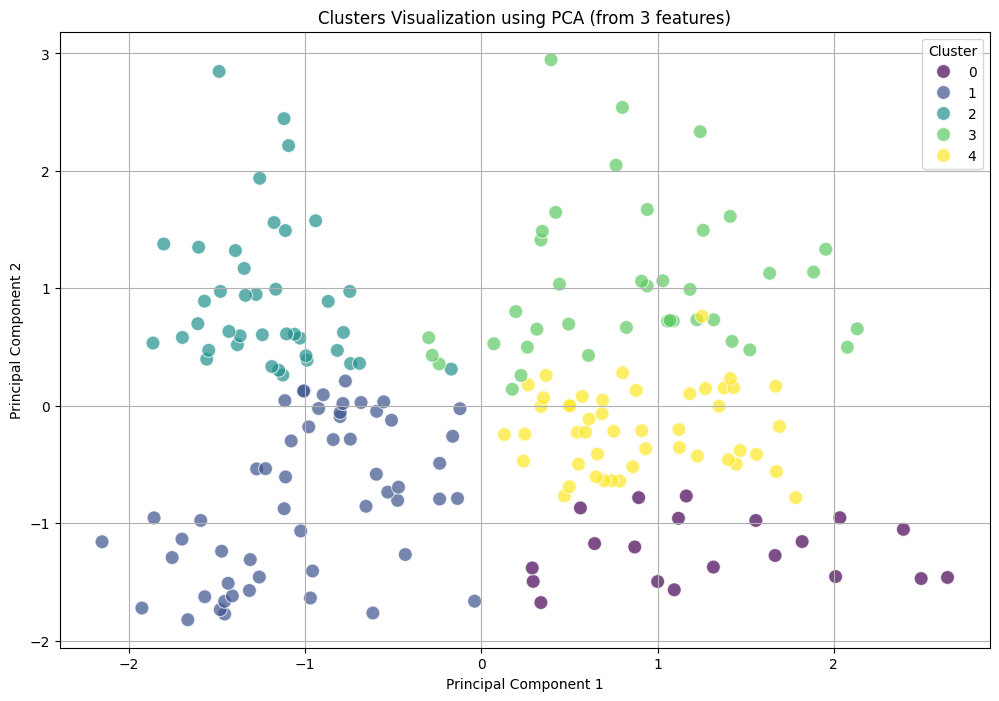

In [40]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster',
                data=df_pca, palette='viridis', s=100, alpha=0.7)
plt.title('Clusters Visualization using PCA (from 3 features)')
plt.grid(True)
plt.show()

In [41]:
silhouette_pca = silhouette_score(X_more_features_scaled, cluster_labels_pca)
print(f"The Silhouette Score when using Age, Income, and Spending Score is: {silhouette_pca:.4f}")

The Silhouette Score when using Age, Income, and Spending Score is: 0.4166
